In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
#  ! pip install matplotlib

In [7]:
! ls -l

total 424
drwx------@ 4 terekhind  staff     128 Mar 24 10:37 archive
-rw-r--r--@ 1 terekhind  staff    3196 May 20 22:04 file_for_gpt.csv
drwxr-xr-x  4 terekhind  staff     128 May 20 21:52 hardware_trojan
-rw-r--r--@ 1 terekhind  staff  209615 Jun  5 12:40 security_ML_Assign_2.ipynb


In [8]:
df = pd.read_csv('./archive/drebin-215-dataset-5560malware-9476-benign.csv')

/var/folders/3v/jtn2l28n5zs3r7hqrp339k900000gn/T/ipykernel_62197/167320011.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./archive/drebin-215-dataset-5560malware-9476-benign.csv')


In [9]:
df.shape

(15036, 216)

In [10]:
df.tail(10)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
15026,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,B
15027,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,0,B
15028,1,1,1,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15029,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,0,B
15030,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,B
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B
15035,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,B


## We can see that in our dataset there are almost 9500 benign malware and around 5500 malicious   

In [11]:
df['class'].value_counts()

class
B    9476
S    5560
Name: count, dtype: int64

In [12]:
def convert_target(x):
    if x == 'B':
        return 0
    else:
        return 1

In [13]:
df['class_conv'] = df['class'].apply(lambda x: convert_target(x))

In [14]:
df.dtypes

transact                       int64
onServiceConnected             int64
bindService                    int64
attachInterface                int64
ServiceConnection              int64
                               ...  
SET_WALLPAPER_HINTS            int64
SET_PREFERRED_APPLICATIONS     int64
WRITE_SECURE_SETTINGS          int64
class                         object
class_conv                     int64
Length: 217, dtype: object

In [15]:
cols = []
for i in df.columns:
    if i == 'class':
        continue
    else:
        cols.append(i)

In [16]:
len(df.columns)

217

In [17]:
len(cols)

216

In [18]:
df = df[cols]

In [19]:
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class_conv
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [20]:
df_not_int = df.select_dtypes(exclude='number')

In [21]:
df_not_int.head()

,TelephonyManager.getSimCountryIso
0,0
1,0
2,0
3,0
4,0


## Only column 'TelephonyManager.getSimCountryIso' is not numerical

In [22]:
#Finding the null values in the data set
if np.any(df.isna().sum()) > 0:
    print('There are Nans in datasets')
else:
    print('All values in the dataset are non-Nan')

All values in the dataset are non-Nan


In [23]:
df['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

In [24]:
df['TelephonyManager.getSimCountryIso'].value_counts()

TelephonyManager.getSimCountryIso
0    6994
0    5514
1    1330
1    1193
?       5
Name: count, dtype: int64

In [25]:
df = df[df['TelephonyManager.getSimCountryIso'] != '?'] 
df['TelephonyManager.getSimCountryIso'] = df['TelephonyManager.getSimCountryIso'].astype('string')
df['TelephonyManager.getSimCountryIso'] = df['TelephonyManager.getSimCountryIso'].astype('int64')

In [26]:
df['TelephonyManager.getSimCountryIso'].unique()

array([0, 1])

In [27]:
df['TelephonyManager.getSimCountryIso']

0        0
1        0
2        0
3        0
4        0
        ..
15031    1
15032    0
15033    0
15034    0
15035    1
Name: TelephonyManager.getSimCountryIso, Length: 15031, dtype: int64

In [28]:
df.head(3)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class_conv
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df['class_conv'].value_counts()

class_conv
0    9476
1    5555
Name: count, dtype: int64

In [30]:
df['class_conv'].dtypes

dtype('int64')

In [31]:
df = df.astype('Int64')

## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [40]:
y = df.class_conv
y = y.astype('int') 

In [41]:
X = df.drop(columns=['class_conv'])

In [42]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)


In [43]:
X.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'SET_ORIENTATION', 'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST',
       'ACCESS_WIFI_STATE', 'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION',
       'SET_WALLPAPER_HINTS', 'SET_PREFERRED_APPLICATIONS',
       'WRITE_SECURE_SETTINGS'],
      dtype='object', length=215)

In [44]:
# df_scales = pd.DataFrame(scaled_features, columns=X.columns)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [175]:
X_train

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
1692,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9922,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,1,1,1,0,0,0
10361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7389,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8797,1,1,1,1,1,1,1,0,0,1,...,0,1,0,0,1,1,1,0,0,0
10999,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2676,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [176]:
X_train.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'SET_ORIENTATION', 'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST',
       'ACCESS_WIFI_STATE', 'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION',
       'SET_WALLPAPER_HINTS', 'SET_PREFERRED_APPLICATIONS',
       'WRITE_SECURE_SETTINGS'],
      dtype='object', length=215)

In [177]:
y_train

1692     1
9922     0
10361    0
7389     0
6326     0
        ..
8797     0
10999    0
499      1
2676     1
5290     1
Name: class_conv, Length: 9018, dtype: int64

In [178]:
max_depths = list(range(1, 21))
train_accuracies, eval_accuracies = [], []

In [179]:
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)

    clf = clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_eval_pred = clf.predict(X_eval)
    eval_accuracy = metrics.accuracy_score(y_eval, y_eval_pred)
    eval_accuracies.append(eval_accuracy)


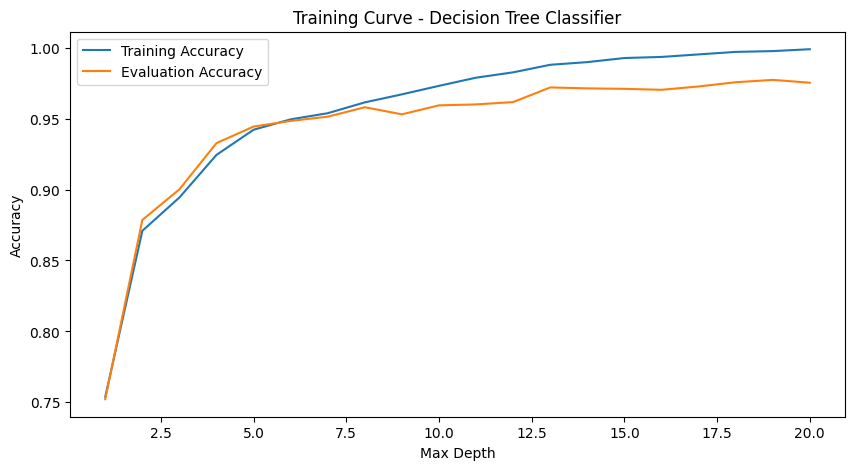

In [180]:
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, eval_accuracies, label='Evaluation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Curve - Decision Tree Classifier')
plt.show()

In [215]:
clf = DecisionTreeClassifier(max_depth = 11)

clf = clf.fit(X_train,y_train)

In [220]:

y_pred = clf.predict(X_eval)
print('Eval data')
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))
print("Precision:",metrics.precision_score(y_eval, y_pred))
print("Recall:",metrics.recall_score(y_eval, y_pred))
print("F1 score:",metrics.f1_score(y_eval, y_pred,  average='weighted'))

Eval data
Accuracy: 0.9604125083166999
Precision: 0.9459459459459459
Recall: 0.9433085501858736
F1 score: 0.9604002480776496


In [219]:

y_pred = clf.predict(X_test)
print('Test data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred,  average='weighted'))

Test data
Accuracy: 0.9557698703026272
Precision: 0.9442446043165468
Recall: 0.936663693131133
F1 score: 0.955733377578622


In [184]:
metrics.confusion_matrix(y_test, y_pred)

array([[1827,   59],
       [  69, 1052]])

In [185]:
importances_sk = clf.feature_importances_

In [186]:
feature_importance = pd.DataFrame(importances_sk, X_train.columns).reset_index()

In [187]:
columns=['features', 'importance']

In [188]:
feature_importance.columns = columns

In [189]:
feature_importance.sort_values(ascending=False, by='importance')[:10]

,features,importance
0,transact,0.350758
13,READ_PHONE_STATE,0.222790
6,SEND_SMS,0.107895
68,TelephonyManager.getDeviceId,0.043773
7,Ljava.lang.Class.getCanonicalName,0.026714
15,ClassLoader,0.022185
41,android.telephony.gsm.SmsManager,0.017499
55,android.intent.action.SEND_MULTIPLE,0.013639
8,Ljava.lang.Class.getMethods,0.012331
204,CLEAR_APP_CACHE,0.012080


In [190]:
feature_importance.shape

(215, 2)

## We can see that first 3 rows have 0.35 + 0.22 + 0.1 = 0.67 of importance out of 215 features

## Naive Bayes classifier 

In [232]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


In [233]:
gnb = GaussianNB()

In [234]:
gnb.fit(X_train, y_train)

GaussianNB()

In [235]:
y_pred_test = gnb.predict(X_test)
print('Scores for Test data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 score:",metrics.f1_score(y_test, y_pred_test,  average='weighted'))


Scores for Test data
Accuracy: 0.7020285999334885
Precision: 0.5571356018283392
Recall: 0.9785905441570026
F1 score: 0.6997073993103361


In [236]:
y_pred_eval = gnb.predict(X_eval)
print('Scores for Eval data')
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred_eval))
print("Precision:",metrics.precision_score(y_eval, y_pred_eval))
print("Recall:",metrics.recall_score(y_eval, y_pred_eval))
print("F1 score:",metrics.f1_score(y_eval, y_pred_eval,  average='weighted'))

Scores for Eval data
Accuracy: 0.698270126413839
Precision: 0.5435342606903658
Recall: 0.9804832713754646
F1 score: 0.6979523987960856


In [237]:
proba = gnb.predict_proba(X_test)

In [238]:
proba

array([[1.31908628e-185, 1.00000000e+000],
       [2.71873271e-141, 1.00000000e+000],
       [2.53897834e-148, 1.00000000e+000],
       ...,
       [9.77714665e-146, 1.00000000e+000],
       [2.58598271e-154, 1.00000000e+000],
       [2.76386467e-097, 1.00000000e+000]])

In [239]:
instance_index = 0
class_probabilities = proba[instance_index]

for class_label, prob in zip(gnb.classes_, class_probabilities):
    print(f"Class {class_label}: {prob}")

Class 0: 1.3190862815268773e-185
Class 1: 1.0


In [229]:
naive_bayes = GaussianNB()

scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-Score': make_scorer(f1_score)
}

k = 10 
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
results = cross_validate(naive_bayes, X, y, cv=cv, scoring=scoring)

for fold in range(k):
    fold_prefix = f"Fold {fold+1}"
    for metric in scoring:
        metric_score = results[f"test_{metric}"][fold]
        print(f"{fold_prefix} - {metric}: {metric_score:.4f}")
    print("-" * 30)

average_scores = {metric: results[f"test_{metric}"].mean() for metric in scoring}
print("Average Scores:")
for metric, score in average_scores.items():
    print(f"{metric}: {score:.4f}")

Fold 1 - Accuracy: 0.6915
Fold 1 - Precision: 0.5459
Fold 1 - Recall: 0.9838
Fold 1 - F1-Score: 0.7022
------------------------------
Fold 2 - Accuracy: 0.7039
Fold 2 - Precision: 0.5568
Fold 2 - Recall: 0.9784
Fold 2 - F1-Score: 0.7097
------------------------------
Fold 3 - Accuracy: 0.7119
Fold 3 - Precision: 0.5643
Fold 3 - Recall: 0.9712
Fold 3 - F1-Score: 0.7138
------------------------------
Fold 4 - Accuracy: 0.7219
Fold 4 - Precision: 0.5731
Fold 4 - Recall: 0.9730
Fold 4 - F1-Score: 0.7213
------------------------------
Fold 5 - Accuracy: 0.7199
Fold 5 - Precision: 0.5702
Fold 5 - Recall: 0.9856
Fold 5 - F1-Score: 0.7225
------------------------------
Fold 6 - Accuracy: 0.7332
Fold 6 - Precision: 0.5841
Fold 6 - Recall: 0.9640
Fold 6 - F1-Score: 0.7274
------------------------------
Fold 7 - Accuracy: 0.7013
Fold 7 - Precision: 0.5542
Fold 7 - Recall: 0.9766
Fold 7 - F1-Score: 0.7071
------------------------------
Fold 8 - Accuracy: 0.7099
Fold 8 - Precision: 0.5619
Fold 8 - 

## After cross validation the mean value for F1-score was 0.71. this value is less than other alrotithms have

## Gradient Boosting Classifier

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

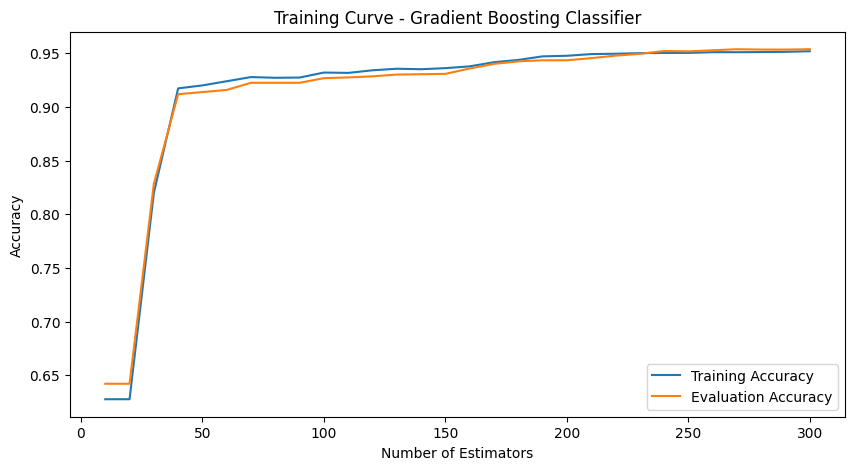

In [204]:
n_estimators = list(range(10, 301, 10)) 
train_accuracies, eval_accuracies = [], []

for n in n_estimators:
    clf = GradientBoostingClassifier(n_estimators=n, learning_rate=0.01, random_state=0)

    clf = clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_eval_pred = clf.predict(X_eval)
    eval_accuracy = accuracy_score(y_eval, y_eval_pred)
    eval_accuracies.append(eval_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(n_estimators, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators, eval_accuracies, label='Evaluation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Curve - Gradient Boosting Classifier')
plt.show()



In [205]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01 , random_state=0)

In [206]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, random_state=0)

In [207]:
y_pred_test = clf.predict(X_test)
print('Scores for Text data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 score:",metrics.f1_score(y_test, y_pred_test,  average='weighted'))

Scores for Text data
Accuracy: 0.9394745593614898
Precision: 0.921832884097035
Recall: 0.9152542372881356
F1 score: 0.9394302360222226


In [208]:
y_pred_eval = clf.predict(X_eval)
print('Scores for Eval data')
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred_eval))
print("Precision:",metrics.precision_score(y_eval, y_pred_eval))
print("Recall:",metrics.recall_score(y_eval, y_pred_eval))
print("F1 score:",metrics.f1_score(y_eval, y_pred_eval,  average='weighted'))

Scores for Eval data
Accuracy: 0.9434464404524284
Precision: 0.9186691312384473
Recall: 0.9237918215613383
F1 score: 0.9434810378870329


In [209]:
metrics.confusion_matrix(y_test, y_pred)

array([[1827,   59],
       [  69, 1052]])

In [210]:
importances_sk = clf.feature_importances_

In [211]:
feature_importance = pd.DataFrame(importances_sk, X_train.columns).reset_index()

In [212]:
columns=['features', 'importance']

In [213]:
feature_importance.columns = columns

In [214]:
feature_importance.sort_values(ascending=False, by='importance')[:15]

,features,importance
13,READ_PHONE_STATE,0.208410
0,transact,0.179007
1,onServiceConnected,0.178487
6,SEND_SMS,0.174758
30,TelephonyManager.getLine1Number,0.029474
42,WRITE_HISTORY_BOOKMARKS,0.021229
3,attachInterface,0.018237
52,INTERNET,0.016646
7,Ljava.lang.Class.getCanonicalName,0.015278
79,chmod,0.013990


## Here we can see that first three the most important features have only 0.20 + 0.17 + 0.17 = 0.54. Compared to Decision Tree algorithm we can see that in Gradient boosting classifier algorithm feature importance is more distributed. More over we can notice that there is new column in the top 4 most important columns: "onServiceConnected" 

## Here we will try to bypass the model

In [80]:
X_test.shape

(3007, 215)

In [81]:
y_pred_test = clf.predict(X_test)

In [82]:
X_test['predicted_class'] = y_pred_test

In [83]:
X_test['predicted_class'].head(5)

2023     1
10870    0
4363     1
14717    0
3472     1
Name: predicted_class, dtype: int64

## We can take one of this index where the predicted class is 1 (malware) and check whether the real class of this row is 1 (malware)

In [84]:
X_test[X_test['predicted_class'] ==1].head(5)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,predicted_class
2023,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,1
4363,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
928,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


We can take rows this index 2021

In [85]:
df.loc[[2021]]['class_conv']

2021    1
Name: class_conv, dtype: Int64

## Yes, we can that the real class of this row is 1 (malware). We can try to adapt this row bypass our model such way that it is classified as binign by the model.

## First try

My first idea is to analyze top 4 most important features from 'feature_importances_' of our Gradient Boosting classifier. 
These features are:
1) READ_PHONE_STATE,
2) SEND_SMS,
3) transact,
4) onServiceConnected

We can change values in these columns to opposite (from 0 to 1 and from 1 to 0)

In [86]:
df.loc[[2021]][['READ_PHONE_STATE', 'SEND_SMS', 'transact', 'onServiceConnected','class_conv']]

,READ_PHONE_STATE,SEND_SMS,transact,onServiceConnected,class_conv
2021,1,0,0,1,1


In [87]:
df.loc[2021, 'READ_PHONE_STATE'] = 0
df.loc[2021, 'SEND_SMS'] = 1
df.loc[2021, 'transact'] = 1
df.loc[2021, 'onServiceConnected'] = 0

In [88]:
df.loc[[2021]][['READ_PHONE_STATE', 'SEND_SMS', 'transact', 'onServiceConnected','class_conv']]

,READ_PHONE_STATE,SEND_SMS,transact,onServiceConnected,class_conv
2021,0,1,1,0,1


In [89]:
df.loc[[2021]]

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class_conv
2021,1,0,1,0,1,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


## Lets try our model

In [90]:
y = df.class_conv
y = y.astype('int') 

X = df.drop(columns=['class_conv'])
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)
# df_scales = pd.DataFrame(scaled_features, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01 , random_state=0)

clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300, random_state=0)

In [91]:
y_pred_test = clf.predict(X_test)
print('Scores for Text data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 score:",metrics.f1_score(y_test, y_pred_test,  average='weighted'))

Scores for Text data
Accuracy: 0.9477884935151314
Precision: 0.9454713493530499
Recall: 0.9125780553077609
F1 score: 0.9475934940436991


In [92]:
X_test['predicted_class'] = y_pred_test

In [93]:
X_test.loc[[2021]]['predicted_class']

2021    1
Name: predicted_class, dtype: int64

## It did not help up to bypass the model. Lets try another approach

First of all we need to rerurn all changed values 

In [94]:
df.loc[2021, 'READ_PHONE_STATE'] = 1
df.loc[2021, 'SEND_SMS'] = 0
df.loc[2021, 'transact'] = 0
df.loc[2021, 'onServiceConnected'] = 1

## Second try

## In this approach i tried to find most commomly used features for malicios programs and least used features for benign programs. This information could give me insights which parameters i need to change for bypass the model

In [95]:
df.shape

(15031, 216)

In [96]:
column_sums_malvare = df[df['class_conv'] == 1].sum()

In [97]:
df[df['class_conv'] == 1].shape

(5555, 216)

In [98]:
column_sums_malvare.sort_values(ascending=False)[:100]

class_conv                   5555
INTERNET                     5340
READ_PHONE_STATE             4946
Binder                       3770
android.os.IBinder           3758
                             ... 
MOUNT_UNMOUNT_FILESYSTEMS     235
CAMERA                        231
PROCESS_OUTGOING_CALLS        225
sendDataMessage               222
SET_ALARM                     207
Length: 100, dtype: int64

In [99]:
top_malware_columns = column_sums_malvare.sort_values(ascending=False)[:150].index

In [100]:
top_malware_columns

Index(['class_conv', 'INTERNET', 'READ_PHONE_STATE', 'Binder',
       'android.os.IBinder', 'IBinder', 'WRITE_EXTERNAL_STORAGE',
       'ACCESS_NETWORK_STATE', 'TelephonyManager.getDeviceId', 'onBind',
       ...
       'android.intent.action.SENDTO', 'defineClass', 'BROADCAST_STICKY',
       'BROADCAST_SMS', 'BIND_DEVICE_ADMIN', 'getBinder', 'HARDWARE_TEST',
       'android.intent.action.PACKAGE_CHANGED', 'READ_SYNC_SETTINGS',
       'SET_ORIENTATION'],
      dtype='object', length=150)

In [101]:
top_malware_columns_set = set(top_malware_columns)

In [102]:
column_sums_binign = df[df['class_conv'] != 1].sum()

In [103]:
df[df['class_conv'] != 1].shape

(9476, 216)

In [104]:
# column_sums_binign.sort_values(ascending=False)[:20]

In [105]:
column_sums_binign.sort_values(ascending=True)[:100]

class_conv                                           0
createSubprocess                                     4
BIND_VPN_SERVICE                                     8
Runtime.loadLibrary                                 15
SET_ACTIVITY_WATCHER                                15
                                                  ... 
STATUS_BAR                                         344
GLOBAL_SEARCH                                      364
PathClassLoader                                    378
READ_HISTORY_BOOKMARKS                             394
android.intent.action.ACTION_POWER_DISCONNECTED    405
Length: 100, dtype: int64

In [106]:
top_benign_columns = column_sums_binign.sort_values(ascending=True)[:150].index

In [107]:
top_benign_columns_set = set(top_benign_columns)

In [108]:
diff_columns = top_malware_columns_set.intersection(top_benign_columns_set)

In [109]:
diff_columns

{'/system/bin',
 'ACCESS_LOCATION_EXTRA_COMMANDS',
 'ACCESS_MOCK_LOCATION',
 'BATTERY_STATS',
 'BIND_DEVICE_ADMIN',
 'BIND_WALLPAPER',
 'BLUETOOTH',
 'BLUETOOTH_ADMIN',
 'BROADCAST_SMS',
 'BROADCAST_STICKY',
 'CALL_PHONE',
 'CHANGE_COMPONENT_ENABLED_STATE',
 'CHANGE_CONFIGURATION',
 'CHANGE_NETWORK_STATE',
 'CLEAR_APP_CACHE',
 'CONTROL_LOCATION_UPDATES',
 'DELETE_CACHE_FILES',
 'DELETE_PACKAGES',
 'DEVICE_POWER',
 'DISABLE_KEYGUARD',
 'EXPAND_STATUS_BAR',
 'FLASHLIGHT',
 'GET_PACKAGE_SIZE',
 'GLOBAL_SEARCH',
 'HARDWARE_TEST',
 'INSTALL_PACKAGES',
 'KILL_BACKGROUND_PROCESSES',
 'Ljava.lang.Class.getClasses',
 'MODIFY_AUDIO_SETTINGS',
 'MODIFY_PHONE_STATE',
 'MOUNT_UNMOUNT_FILESYSTEMS',
 'PROCESS_OUTGOING_CALLS',
 'PackageInstaller',
 'ProcessBuilder',
 'READ_CALENDAR',
 'READ_EXTERNAL_STORAGE',
 'READ_HISTORY_BOOKMARKS',
 'READ_LOGS',
 'READ_SMS',
 'READ_SYNC_SETTINGS',
 'RECEIVE_MMS',
 'RECEIVE_SMS',
 'RECEIVE_WAP_PUSH',
 'RECORD_AUDIO',
 'RESTART_PACKAGES',
 'SEND_SMS',
 'SET_ALARM',


In [110]:
diff_columns = list(diff_columns)

## We need to set 0 for this features to bypass our model

In [111]:
df.shape

(15031, 216)

In [112]:
df.loc[[2021]][diff_columns]

,android.intent.action.NEW_OUTGOING_CALL,android.intent.action.BATTERY_LOW,READ_SYNC_SETTINGS,READ_EXTERNAL_STORAGE,GLOBAL_SEARCH,CONTROL_LOCATION_UPDATES,DISABLE_KEYGUARD,findClass,WRITE_CALENDAR,MODIFY_PHONE_STATE,...,WRITE_SYNC_SETTINGS,SET_WALLPAPER_HINTS,WRITE_APN_SETTINGS,INSTALL_PACKAGES,WRITE_SECURE_SETTINGS,DELETE_CACHE_FILES,android.intent.action.PACKAGE_REMOVED,MODIFY_AUDIO_SETTINGS,TelephonyManager.getSimSerialNumber,android.intent.action.PACKAGE_REPLACED
2021,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I need to find those features where there are 1s

In [113]:
filtered_columns = df.loc[2021, diff_columns][df.loc[2021, diff_columns] == 1]
# Access the column names as a list
selected_columns = filtered_columns.index.tolist()

In [114]:
selected_columns

['READ_EXTERNAL_STORAGE', 'chmod', 'BROADCAST_STICKY', 'class_conv']

In [115]:
df_features_without_target = [col for col in selected_columns if col != 'class_conv']

In [116]:
df_features_without_target

['READ_EXTERNAL_STORAGE', 'chmod', 'BROADCAST_STICKY']

Change values to 0s

In [117]:
for i in df_features_without_target:
    df.loc[2021, i] = 0

In [118]:
df.loc[[2021]][df_features_without_target]

,READ_EXTERNAL_STORAGE,chmod,BROADCAST_STICKY
2021,0,0,0


## Lets check it and train the model

In [119]:
y = df.class_conv
y = y.astype('int') 

X = df.drop(columns=['class_conv'])
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)
# df_scales = pd.DataFrame(scaled_features, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01 , random_state=0)

clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300, random_state=0)

In [120]:
y_pred_test = clf.predict(X_test)
print('Scores for Text data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 score:",metrics.f1_score(y_test, y_pred_test,  average='weighted'))

Scores for Text data
Accuracy: 0.9474559361489857
Precision: 0.9454209065679926
Recall: 0.911685994647636
F1 score: 0.9472543738403716


In [121]:
X_test['predicted_class'] = y_pred_test

In [122]:
X_test.loc[[2021]]['predicted_class']

2021    0
Name: predicted_class, dtype: int64

## this approach works, i could bypass the model

## Third try

## Now i am going to set reverse vales for top 10 features from feature importance. First of all i need to reset all values to original ones

In [123]:
df_features_without_target

['READ_EXTERNAL_STORAGE', 'chmod', 'BROADCAST_STICKY']

Set all values in the default position

In [124]:
df.loc[2021, 'READ_PHONE_STATE'] = 1
df.loc[2021, 'SEND_SMS'] = 0
df.loc[2021, 'transact'] = 0
df.loc[2021, 'onServiceConnected'] = 1
df.loc[2021, 'BROADCAST_STICKY'] = 1
df.loc[2021, 'READ_EXTERNAL_STORAGE'] = 1
df.loc[2021, 'chmod'] = 1


In [125]:
feature_importance.sort_values(ascending=False, by='importance')[:25]

,features,importance
13,READ_PHONE_STATE,0.196876
6,SEND_SMS,0.172333
0,transact,0.169431
1,onServiceConnected,0.169203
30,TelephonyManager.getLine1Number,0.028104
42,WRITE_HISTORY_BOOKMARKS,0.021334
7,Ljava.lang.Class.getCanonicalName,0.018357
52,INTERNET,0.017907
68,TelephonyManager.getDeviceId,0.017511
3,attachInterface,0.017222


In [126]:
df['chmod'].value_counts()

chmod
0    13335
1     1696
Name: count, dtype: Int64

In [127]:
df.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class_conv'],
      dtype='object', length=216)

In [128]:
df[df['class_conv'] == 0]['Ljava.lang.Class.getCanonicalName'].value_counts()

Ljava.lang.Class.getCanonicalName
0    4744
1    4732
Name: count, dtype: Int64

In [129]:
df[df['class_conv'] == 1]['Ljava.lang.Class.getCanonicalName'].value_counts()

Ljava.lang.Class.getCanonicalName
0    5313
1     242
Name: count, dtype: Int64

In [130]:
df.loc[[2021]][['READ_PHONE_STATE', 'SEND_SMS', 'transact', 'onServiceConnected','TelephonyManager.getLine1Number','WRITE_HISTORY_BOOKMARKS','GET_ACCOUNTS','Ljava.net.URLDecoder','Ljava.lang.Class.getMethods','android.telephony.gsm.SmsManager','chmod','attachInterface','TelephonyManager.getDeviceId','INTERNET','Ljava.lang.Class.getCanonicalName','class_conv']]

,READ_PHONE_STATE,SEND_SMS,transact,onServiceConnected,TelephonyManager.getLine1Number,WRITE_HISTORY_BOOKMARKS,GET_ACCOUNTS,Ljava.net.URLDecoder,Ljava.lang.Class.getMethods,android.telephony.gsm.SmsManager,chmod,attachInterface,TelephonyManager.getDeviceId,INTERNET,Ljava.lang.Class.getCanonicalName,class_conv
2021,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1


In [131]:
# df.loc[2021, 'READ_PHONE_STATE'] = 1
df.loc[2021, 'transact'] = 1

# df.loc[2021, 'TelephonyManager.getDeviceId'] = 0
df.loc[2021, 'Ljava.lang.Class.getCanonicalName'] = 1


In [132]:
# df.loc[2021, 'READ_PHONE_STATE'] = 0   ## with these values we got 0
# df.loc[2021, 'transact'] = 1
# # df.loc[2021, 'INTERNET'] = 0
# # df.loc[2021, 'onServiceConnected'] = 0
# df.loc[2021, 'TelephonyManager.getDeviceId'] = 0
# df.loc[2021, 'Ljava.lang.Class.getCanonicalName'] = 1


In [133]:
df.loc[[2021]][['READ_PHONE_STATE', 'SEND_SMS', 'transact', 'onServiceConnected','TelephonyManager.getLine1Number','WRITE_HISTORY_BOOKMARKS','GET_ACCOUNTS','Ljava.net.URLDecoder','Ljava.lang.Class.getMethods','android.telephony.gsm.SmsManager','chmod','attachInterface','TelephonyManager.getDeviceId','INTERNET','Ljava.lang.Class.getCanonicalName','class_conv']]

,READ_PHONE_STATE,SEND_SMS,transact,onServiceConnected,TelephonyManager.getLine1Number,WRITE_HISTORY_BOOKMARKS,GET_ACCOUNTS,Ljava.net.URLDecoder,Ljava.lang.Class.getMethods,android.telephony.gsm.SmsManager,chmod,attachInterface,TelephonyManager.getDeviceId,INTERNET,Ljava.lang.Class.getCanonicalName,class_conv
2021,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,1


In [134]:
df.loc[[2021]]

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class_conv
2021,1,1,1,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [135]:
y = df.class_conv
y = y.astype('int') 

X = df.drop(columns=['class_conv'])
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)
# df_scales = pd.DataFrame(scaled_features, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_test.loc[[2021]][['READ_PHONE_STATE', 'SEND_SMS', 'transact', 'onServiceConnected','TelephonyManager.getLine1Number','WRITE_HISTORY_BOOKMARKS','GET_ACCOUNTS','Ljava.net.URLDecoder','Ljava.lang.Class.getMethods','android.telephony.gsm.SmsManager','chmod','attachInterface','TelephonyManager.getDeviceId','INTERNET','Ljava.lang.Class.getCanonicalName']]

,READ_PHONE_STATE,SEND_SMS,transact,onServiceConnected,TelephonyManager.getLine1Number,WRITE_HISTORY_BOOKMARKS,GET_ACCOUNTS,Ljava.net.URLDecoder,Ljava.lang.Class.getMethods,android.telephony.gsm.SmsManager,chmod,attachInterface,TelephonyManager.getDeviceId,INTERNET,Ljava.lang.Class.getCanonicalName
2021,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1


In [137]:
y_test.loc[[2023]]

2023    1
Name: class_conv, dtype: int64

In [138]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01 , random_state=0)

clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [139]:
y_pred_test = clf.predict(X_test)
print('Scores for Text data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 score:",metrics.f1_score(y_test, y_pred_test,  average='weighted'))

Scores for Text data
Accuracy: 0.9215164615896242
Precision: 0.90633608815427
Recall: 0.8804638715432649
F1 score: 0.9212783644968261


In [140]:
X_test['predicted_class'] = y_pred_test

In [141]:
X_test.loc[[2021]]['predicted_class']

2021    0
Name: predicted_class, dtype: int64

## We did it.Model showed wrong result for this malicious program

## For improving our mode lwe can use different parameters such as max_depth and max_features, which could limit feature weights and make the mode more protected

In [142]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [143]:
y = df.class_conv
y = y.astype('int') 

X = df.drop(columns=['class_conv'])
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)
# df_scales = pd.DataFrame(scaled_features, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 50],
    'max_depth': [3, 5, 7, 10],
    'max_features':['sqrt', 'log2']
}

In [145]:
clf = GradientBoostingClassifier()
grid_model = GridSearchCV(clf, param_grid, cv=5)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 50]})

In [146]:
best_params = grid_model.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


In [147]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate= 0.1 , random_state=0, max_depth=7, max_features='sqrt')

ensemble_model = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=42)

ensemble_model.fit(X_train, y_train)

/Users/terekhind/Desktop/Studying/USI/Second_semester/Security aspects of ML /Assignment_2/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=GradientBoostingClassifier(max_depth=7,
                                                            max_features='sqrt',
                                                            n_estimators=200,
                                                            random_state=0),
                  random_state=42)

In [148]:
y_pred_test = ensemble_model.predict(X_test)
print('Scores for Text data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 score:",metrics.f1_score(y_test, y_pred_test,  average='weighted'))

Scores for Text data
Accuracy: 0.9903558363817758
Precision: 0.9954627949183303
Recall: 0.9785905441570026
F1 score: 0.9903387896555513


In [149]:
X_test['predicted_class'] = y_pred_test

In [150]:
X_test.loc[[2021]]['predicted_class']

2021    1
Name: predicted_class, dtype: int64

## I did it. Model was able to recognize the malicious program even though we tried to bypass the model with changed features

## 2. Hardware Trojan Detection

In [6]:
# https://www.kaggle.com/datasets/subhajournal/trojan-detection

In [241]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from xgboost import XGBClassifier



In [242]:
df_trojan = pd.read_csv('./hardware_trojan/Trojan_Detection.csv')

In [243]:
df_trojan.head(4)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan


In [244]:
df_trojan = df_trojan.dropna()

df_trojan = df_trojan.drop(["Unnamed: 0"], axis = 1)

In [245]:
df_trojan.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [246]:
def convert_target(x):
    if x == 'Benign':
        return 0
    else:
        return 1
    
df_trojan['Class'] = df_trojan['Class'].apply(lambda x: convert_target(x))

In [247]:
df_trojan.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [248]:
good_cols = []
for col in df_trojan.columns:
    good_cols.append(col.strip())
df_trojan.columns = good_cols

In [249]:
df_trojan.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [250]:
df_trojan['Class'].value_counts()

Class
1    90683
0    86799
Name: count, dtype: int64

In [251]:
df_trojan.shape

(177482, 85)

In [153]:
df_trojan = df_trojan.drop_duplicates()

In [155]:
df_trojan = df_trojan.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp'], axis=1)

X = df_trojan.drop('Class', axis=1)
y = df_trojan['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=10)),
    ('classifier', XGBClassifier())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

/Users/terekhind/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [33 34 35 47 51 52 58 59 60 61 62 63] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/terekhind/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 0.6407865453418599
Precision: 0.6465683838551157
Recall: 0.6483942414174972
F1 Score: 0.6474800254347406
ROC AUC Score: 0.6406506390892039


In [156]:
from tqdm import tqdm

In [157]:
constant_features = X_train.columns[X_train.nunique() == 1]
X_train = X_train.drop(constant_features, axis=1)
X_test = X_test.drop(constant_features, axis=1)

In [158]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=10)),
    ('classifier', XGBClassifier())
])

# Define the hyperparameters grid for grid search
param_grid = {
    'selector__k': [5, 15],
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [3, 7]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics using the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

Accuracy: 0.6784517001436741
Precision: 0.6913729555401981
Recall: 0.6647286821705426
F1 Score: 0.6777890695573622
ROC AUC Score: 0.6786968524117609
Best Hyperparameters: {'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'selector__k': 15}


In [159]:


# Get the best model
best_model = grid_search.best_estimator_

# Ensemble Methods - Voting Classifier
from sklearn.ensemble import VotingClassifier

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('best_model', best_model)
], voting='soft')

# Cross-validation
scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean CV Accuracy:", mean_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Mean CV Accuracy: 0.7229636933478889
Accuracy: 0.7304560948812576
Precision: 0.7425177061914553
Recall: 0.7198228128460686
F1 Score: 0.7309941520467836
ROC AUC Score: 0.73064605114403


In [160]:
metrics.confusion_matrix(y_test, y_pred)

array([[12929,  4508],
       [ 5060, 13000]])

In [9]:
df_trojan.dtypes[:20]

Flow ID                          object
 Source IP                       object
 Source Port                      int64
 Destination IP                  object
 Destination Port                 int64
 Protocol                         int64
 Timestamp                       object
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets     float64
 Total Length of Bwd Packets    float64
 Fwd Packet Length Max          float64
 Fwd Packet Length Min          float64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max           float64
 Bwd Packet Length Min          float64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
dtype: object